In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols

c:\users\bhdib\.virtualenvs\data-yijqg3ta\lib\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


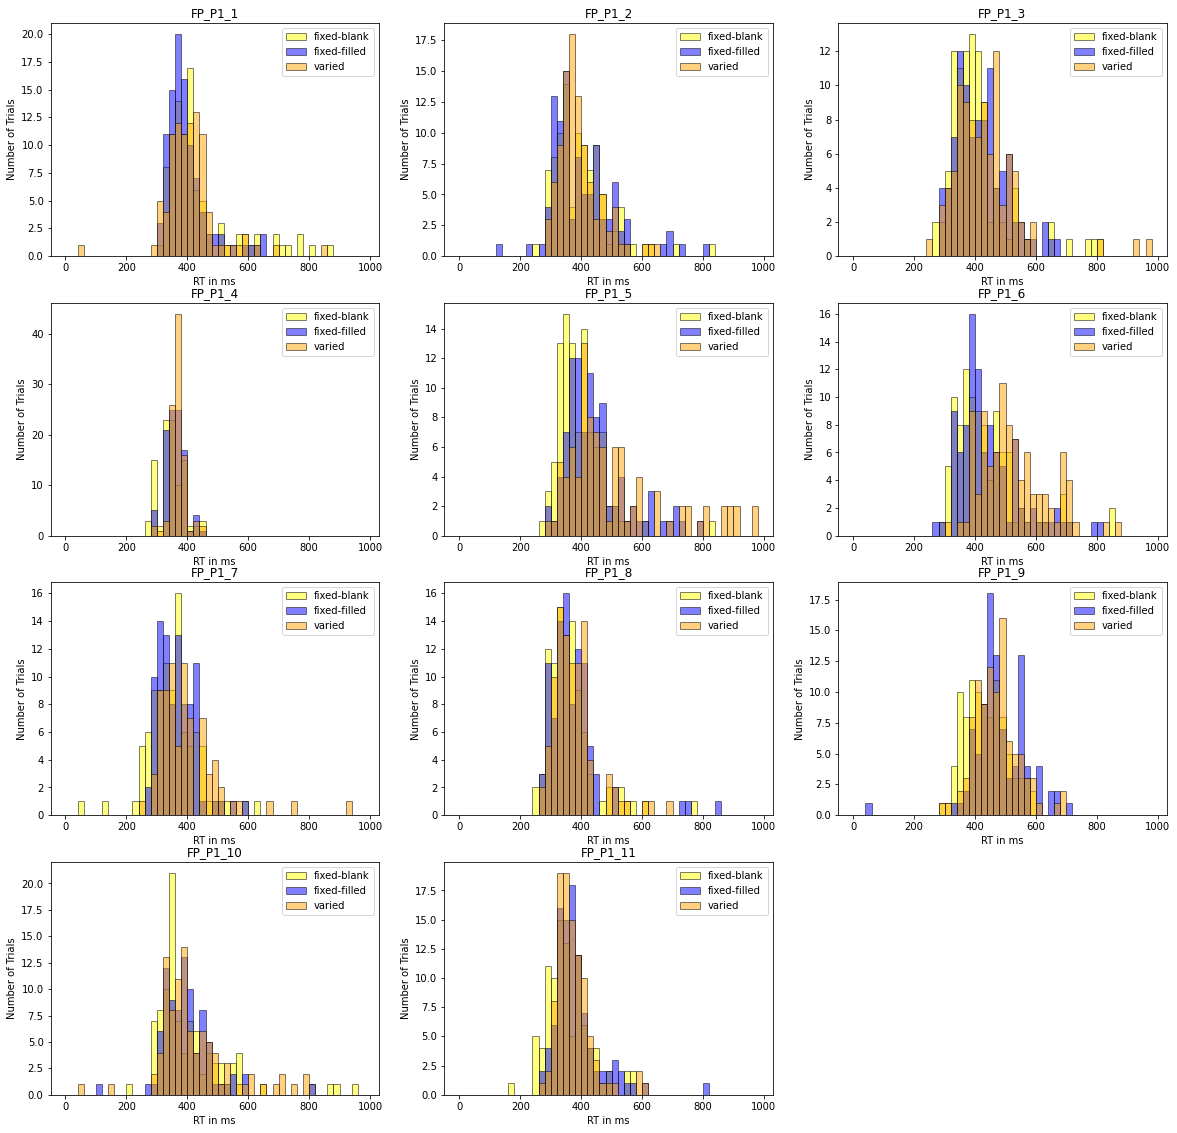

In [3]:
path = "csv_files/"
all_files = glob.glob(path + "*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
    
block = []
i=0    
while i < 1000:
    block.append(i)
    i+=20
    

n=1
plt.figure(figsize = (20,30))
for df in li:
    fb = df[(df['block'] == 'fixed-blank') & (df['rt'] >= 0) & (df['correct'] == True)]
    ff = df[(df['block'] == 'fixed-filled') & (df['rt'] >= 0) & (df['correct'] == True)]
    v = df[(df['block'] == 'varied') & (df['rt'] >= 0) & (df['correct'] == True)]
    
    plt.subplot(6,3,n)
    plt.hist(fb.rt, bins=block, alpha=0.5, edgecolor="black", color="yellow", label="fixed-blank")
    plt.hist(ff.rt, bins=block, alpha=0.5, edgecolor="black", color="blue", label="fixed-filled")
    plt.hist(v.rt, bins=block, alpha=0.5, edgecolor="black", color="orange", label="varied")
    plt.legend(loc='upper right')
    plt.title("FP_P1_" + str(n))
    plt.xlabel("RT in ms")
    plt.ylabel("Number of Trials")
    n+=1
plt.show()

<AxesSubplot:xlabel='Block Type', ylabel='Mean RT in ms'>

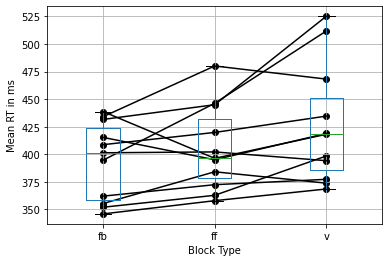

In [7]:
# clear out lists while troubleshooting
bpmns = []
fig, ax=plt.subplots()
plt.xlabel("Block Type")
plt.ylabel("Mean RT in ms")
for df in li:
    dfmns = []
    fb = df[(df['block'] == 'fixed-blank') & (df['rt'] >= 0) & (df['correct'] == True)]
    dfmns.append(fb.rt.mean())
    ff = df[(df['block'] == 'fixed-filled') & (df['rt'] >= 0) & (df['correct'] == True)]
    dfmns.append(ff.rt.mean())
    v = df[(df['block'] == 'varied') & (df['rt'] >= 0) & (df['correct'] == True)]
    dfmns.append(v.rt.mean())
    bpmns.append(dfmns)
    lst = [fb.rt.mean(), ff.rt.mean(), v.rt.mean()]
    lts = ['fixed-blank', 'fixed-filled', 'varied']
    ax.scatter(lts, lst, color='black')
    ax.plot(lts,lst, color="black")
    # [fbmn, ffmn, vmn]
FP_df = pd.DataFrame(np.array(bpmns), columns=['fb', 'ff', 'v'])
FP_df.boxplot(positions=range(len(FP_df.columns)))

In [5]:
FP_df

,fixed-blank,fixed-filled,varied
0,438.734043,396.326531,418.145833
1,401.381443,402.163265,394.204082
2,408.734694,419.833333,434.635417
3,345.928571,357.939394,368.540816
4,394.666667,446.284211,511.872340
5,431.630000,444.970000,525.218750
6,351.989583,362.804348,398.480519
7,362.051546,372.442105,377.305263
8,434.123711,480.113402,468.212121
9,415.329897,395.046512,418.893617


In [12]:
mod = ols("fb~ff+v", data = FP_df).fit()

In [9]:
anov = sm.stats.anova_lm(mod, type=2)

In [10]:
print(anov)

           df       sum_sq      mean_sq         F    PR(>F)
ff        1.0  6768.811116  6768.811116  9.769790  0.014107
v         1.0    28.033438    28.033438  0.040462  0.845600
Residual  8.0  5542.646311   692.830789       NaN       NaN
